# Estudio de un dataset e implementación de un modelo de regressión lineal sobre el mismo
#### Juan Carlos Soriano (1493037) y Jorge Giménez (1493035)

## Estudio del dataset

### 1. Primeramente realizamos los imports necesarios y ajustamos algunas opciones de visualización

In [151]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 15) 

### 2. Cargamos el dataset usando pandas y revisamos algunos datos de referéncia:

In [152]:
dataFrame = pd.read_csv('./Database/Concrete_Data_Yeh.csv', header=0, delimiter=',')

- Dimensiones del dataframe:

In [153]:
dataFrame.shape

(1030, 9)

- Valores nulos por cada atributo:

In [154]:
dataFrame.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

- Descripción rápida del dataset:

In [155]:
dataFrame.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000
mean,281.168,73.896,54.188,181.567,6.205,972.919,773.580,45.662,35.818
std,104.506,86.279,63.997,21.354,5.974,77.754,80.176,63.170,16.706
min,102.000,0.000,0.000,121.800,0.000,801.000,594.000,1.000,2.330
25%,192.375,0.000,0.000,164.900,0.000,932.000,730.950,7.000,23.710
50%,272.900,22.000,0.000,185.000,6.400,968.000,779.500,28.000,34.445
75%,350.000,142.950,118.300,192.000,10.200,1029.400,824.000,56.000,46.135
max,540.000,359.400,200.100,247.000,32.200,1145.000,992.600,365.000,82.600


- Primeras 10 filas:

In [156]:
dataFrame.head(10)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.000,0.000,0.000,162.000,2.500,1040.000,676.000,28,79.990
1,540.000,0.000,0.000,162.000,2.500,1055.000,676.000,28,61.890
2,332.500,142.500,0.000,228.000,0.000,932.000,594.000,270,40.270
3,332.500,142.500,0.000,228.000,0.000,932.000,594.000,365,41.050
4,198.600,132.400,0.000,192.000,0.000,978.400,825.500,360,44.300
5,266.000,114.000,0.000,228.000,0.000,932.000,670.000,90,47.030
6,380.000,95.000,0.000,228.000,0.000,932.000,594.000,365,43.700
7,380.000,95.000,0.000,228.000,0.000,932.000,594.000,28,36.450
8,266.000,114.000,0.000,228.000,0.000,932.000,670.000,28,45.850
9,475.000,0.000,0.000,228.000,0.000,932.000,594.000,28,39.290


### 3. Hacemos unos cuántos plots que nos ayudarán a entender mejor los datos:

- Plot de un histograma por cada variable del dataset:

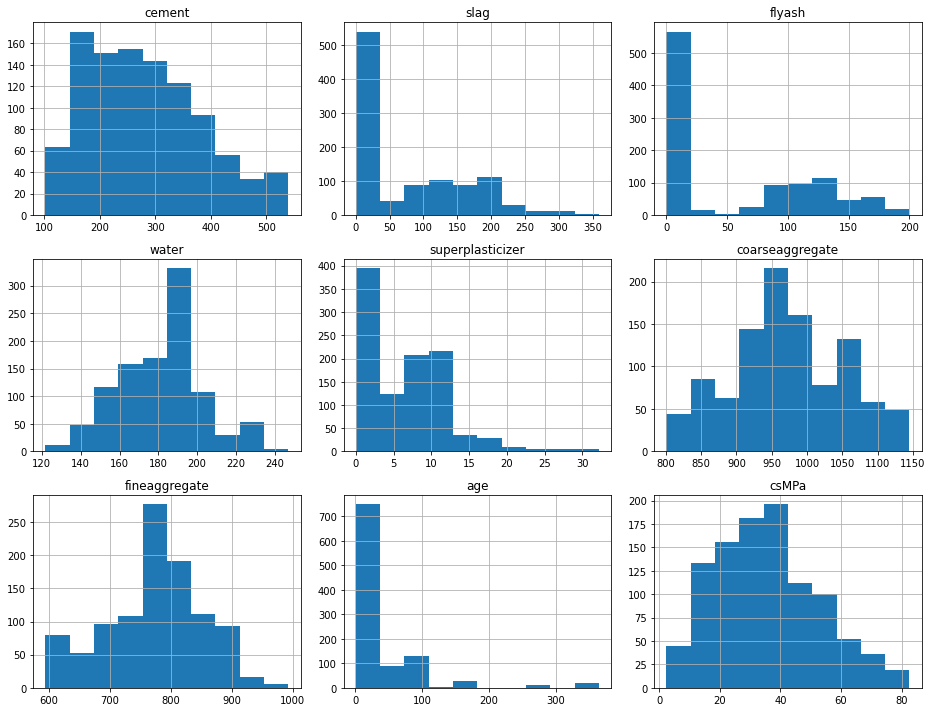

In [157]:
fig, axs = plt.subplots(3, 3)

varIdx = 0
for x in range(3):
    for y in range(3):
        plt.sca(axs[x,y])
        axs[x,y].set_title(dataFrame.columns[varIdx])
        dataFrame[dataFrame.columns[varIdx]].hist(figsize=(13,10))
        varIdx+=1

fig.tight_layout()
plt.show()

- Plot de un scatterplot por variable  de entrada (cement, slag, flyash...) contra la variable output (csMPa) 

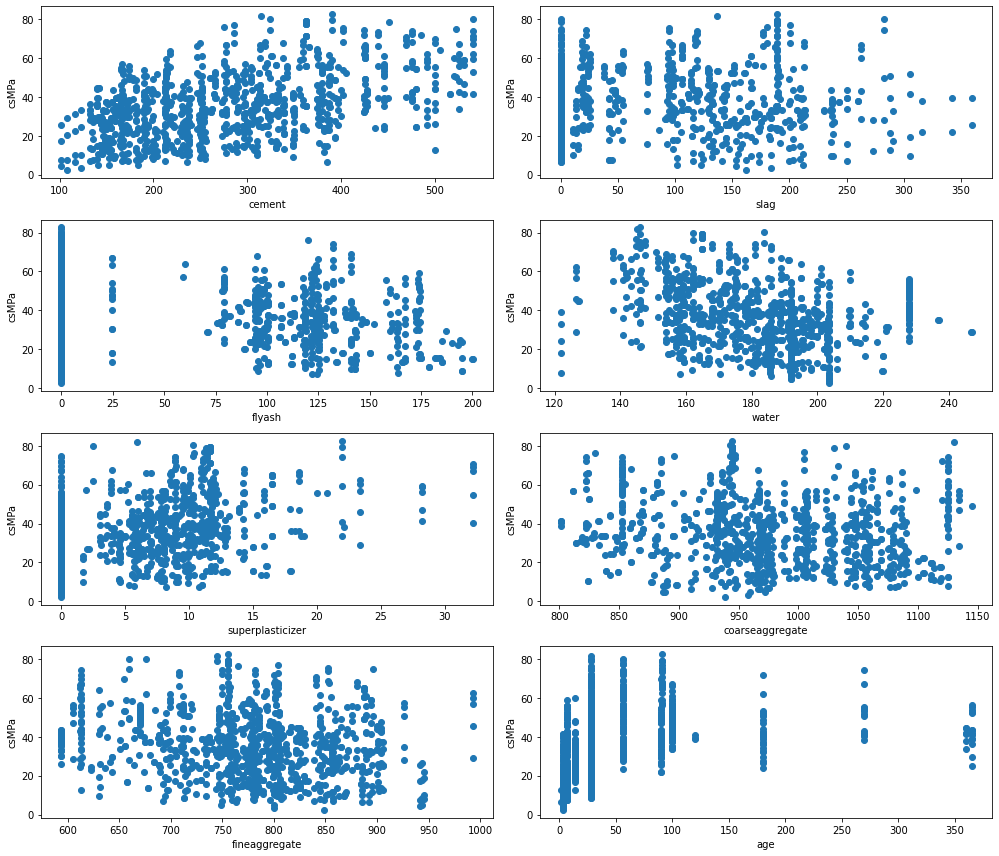

In [158]:
fig, axs = plt.subplots(4, 2, figsize=(14,12))

varIdx = 0
for x in range(4):
    for y in range(2):
        axs[x,y].set(xlabel=dataFrame.columns[varIdx], ylabel='csMPa')
        axs[x,y].plot(dataFrame[dataFrame.columns[varIdx]], dataFrame['csMPa'], 'o')
        varIdx+=1

fig.tight_layout()
plt.show()

- Plot de les correlacions entre variables: